In [1]:
import ROOT
from ROOT import TCanvas, TFile, TProfile, TNtuple, TH1I, TH1F, TH2F, TH3F, TColor, TEfficiency
from ROOT import gROOT, gBenchmark, gRandom, gSystem
import numpy as np
import pdb

Welcome to JupyROOT 6.26/06


In [2]:
%cd /sphenix/u/egm2153/spring_2023
gROOT.LoadMacro("sPhenixStyle.C");
gROOT.ProcessLine("SetsPhenixStyle()")

/direct/sphenix+u/egm2153/spring_2023


0

sPhenixStyle: Applying nominal settings.
sPhenixStyle: ROOT6 mode


In [3]:
%cd /sphenix/user/egm2153/calib_study/detdeta/analysis/runs23727_23746

/gpfs/mnt/gpfs02/sphenix/user/egm2153/calib_study/detdeta/analysis/runs23727_23746


In [4]:
f1 = ROOT.TFile.Open("MC/dETdeta_analysis_allruns_hijing_run14_nozs_mc_reweight_0-5_reweight_hijing.root")
#h_eT_truth = TH1F(f1.Get("hetdeta_ihcalbin"))
#h_eT_truth_ihcalbin = TH1F(f1.Get("hetdeta_ihcalbin"))
#h_eT_truth_ohcalbin = TH1F(f1.Get("hetdeta_ohcalbin"))
#h_eT_truth_calobin = TH1F(f1.Get("hetdeta_calobin"))
h_eT_sim_emcal = TH1F(f1.Get("h_eT_emcal"))
h_eT_sim_ihcal = TH1F(f1.Get("h_eT_ihcal"))
h_eT_sim_ohcal = TH1F(f1.Get("h_eT_ohcal"))
#h_eT_sim_calo = TH1F(f1.Get("h_eT_calo"))
h_2D_sim_emcal = TH2F(f1.Get("h_2D_emcal_calibT"))
h_2D_sim_ihcal = TH2F(f1.Get("h_2D_ihcal_calibT"))
h_2D_sim_ohcal = TH2F(f1.Get("h_2D_ohcal_calibT"))
h_2D_sim_emcal.SetDirectory(0)
h_2D_sim_ihcal.SetDirectory(0)
h_2D_sim_ohcal.SetDirectory(0)
#h_eT_truth.SetDirectory(0)
#h_eT_truth_ihcalbin.SetDirectory(0)
#h_eT_truth_ohcalbin.SetDirectory(0)
#h_eT_truth_calobin.SetDirectory(0)
h_eT_sim_emcal.SetDirectory(0)
h_eT_sim_ihcal.SetDirectory(0)
h_eT_sim_ohcal.SetDirectory(0)
#h_eT_sim_calo.SetDirectory(0)
f1.Close()
#f2 = ROOT.TFile.Open("dETdeta_analysis_23727_z=0_oldtiming_data_noweight_0-10.root") # old hcal calib
f2 = ROOT.TFile.Open("hcal_tsc_studies/dETdeta_analysis_allruns_hcal_tsc_HCal_zs_30ADC_EMCal_zs_40ADC_data_noweight_0-5.root")
h_eT_data_emcal = TH1F(f2.Get("h_eT_emcal"))
h_eT_data_ihcal = TH1F(f2.Get("h_eT_ihcal"))
h_eT_data_ohcal = TH1F(f2.Get("h_eT_ohcal"))
#h_eT_data_calo = TH1F(f2.Get("h_eT_calo"))
h_eT_data_emcal.SetDirectory(0)
h_eT_data_ihcal.SetDirectory(0)
h_eT_data_ohcal.SetDirectory(0)
#h_eT_data_calo.SetDirectory(0)
h_2D_data_emcal = TH2F(f2.Get("h_2D_emcal_calibT"))
h_2D_data_ihcal = TH2F(f2.Get("h_2D_ihcal_calibT"))
h_2D_data_ohcal = TH2F(f2.Get("h_2D_ohcal_calibT"))
h_2D_data_emcal.SetDirectory(0)
h_2D_data_ihcal.SetDirectory(0)
h_2D_data_ohcal.SetDirectory(0)
f2.Close()
f2 = ROOT.TFile.Open("emcal_syst/dETdeta_analysis_allruns_p015_HCal_zs_30ADC_EMCal_zs_40ADC_data_noweight_0-5.root")
h_eT_var_emcal = TH1F(f2.Get("h_eT_emcal"))
h_eT_var_ihcal = TH1F(f2.Get("h_eT_ihcal"))
h_eT_var_ohcal = TH1F(f2.Get("h_eT_ohcal"))
#h_eT_data_calo = TH1F(f2.Get("h_eT_calo"))
h_eT_var_emcal.SetDirectory(0)
h_eT_var_ihcal.SetDirectory(0)
h_eT_var_ohcal.SetDirectory(0)
#h_eT_data_calo.SetDirectory(0)
h_2D_var_emcal = TH2F(f2.Get("h_2D_emcal_calibT"))
h_2D_var_ihcal = TH2F(f2.Get("h_2D_ihcal_calibT"))
h_2D_var_ohcal = TH2F(f2.Get("h_2D_ohcal_calibT"))
h_2D_var_emcal.SetDirectory(0)
h_2D_var_ihcal.SetDirectory(0)
h_2D_var_ohcal.SetDirectory(0)
f2.Close()


In [5]:
h_1D_data_emcal = h_2D_data_emcal.ProjectionY("h_1D_data_emcal", 1, 96)
h_1D_data_ihcal = h_2D_data_ihcal.ProjectionY("h_1D_data_ihcal", 1, 24)
h_1D_data_ohcal = h_2D_data_ohcal.ProjectionY("h_1D_data_ohcal", 1, 24)
h_1D_sim_emcal = h_2D_sim_emcal.ProjectionY("h_1D_sim_emcal", 1, 96)
h_1D_sim_ihcal = h_2D_sim_ihcal.ProjectionY("h_1D_sim_ihcal", 1, 24)
h_1D_sim_ohcal = h_2D_sim_ohcal.ProjectionY("h_1D_sim_ohcal", 1, 24)
h_1D_var_emcal = h_2D_var_emcal.ProjectionY("h_1D_var_emcal", 1, 96)
h_1D_var_ihcal = h_2D_var_ihcal.ProjectionY("h_1D_var_ihcal", 1, 24)
h_1D_var_ohcal = h_2D_var_ohcal.ProjectionY("h_1D_var_ohcal", 1, 24)

In [6]:
emcal_ratio = h_1D_data_emcal.Clone("emcal_ratio")
emcal_var_ratio = h_1D_var_emcal.Clone("emcal_var_ratio")
ihcal_ratio = h_1D_data_ihcal.Clone("ihcal_ratio")
ohcal_ratio = h_1D_data_ohcal.Clone("ohcal_ratio")
ihcal_var_ratio = h_1D_var_ihcal.Clone("ihcal_var_ratio")
ohcal_var_ratio = h_1D_var_ohcal.Clone("ohcal_var_ratio")
for i in range(1, emcal_ratio.GetNbinsX() + 1):
    emcal_ratio.SetBinContent(i,h_1D_sim_emcal.GetBinContent(i)/h_1D_data_emcal.GetBinContent(i)+0.06)
    emcal_ratio.SetBinError(i,h_1D_sim_emcal.GetBinError(i)/h_1D_sim_emcal.GetBinContent(i)+h_1D_data_emcal.GetBinError(i)/h_1D_data_emcal.GetBinContent(i))
    emcal_var_ratio.SetBinContent(i,h_1D_var_emcal.GetBinContent(i)/h_1D_data_emcal.GetBinContent(i))
    emcal_var_ratio.SetBinError(i,h_1D_var_emcal.GetBinError(i)/h_1D_var_emcal.GetBinContent(i)+h_1D_data_emcal.GetBinError(i)/h_1D_data_emcal.GetBinContent(i))
for i in range(1, ihcal_ratio.GetNbinsX() + 1):
    ihcal_ratio.SetBinContent(i,h_1D_sim_ihcal.GetBinContent(i)/h_1D_data_ihcal.GetBinContent(i))
    ihcal_ratio.SetBinError(i,h_1D_sim_ihcal.GetBinError(i)/h_1D_sim_ihcal.GetBinContent(i)+h_1D_data_ihcal.GetBinError(i)/h_1D_data_ihcal.GetBinContent(i))
    ohcal_ratio.SetBinContent(i,h_1D_sim_ohcal.GetBinContent(i)/h_1D_data_ohcal.GetBinContent(i))
    ohcal_ratio.SetBinError(i,h_1D_sim_ohcal.GetBinError(i)/h_1D_sim_ohcal.GetBinContent(i)+h_1D_data_ohcal.GetBinError(i)/h_1D_data_ohcal.GetBinContent(i))
    ihcal_var_ratio.SetBinContent(i,h_1D_sim_ihcal.GetBinContent(i)/h_1D_var_ihcal.GetBinContent(i))
    ihcal_var_ratio.SetBinError(i,h_1D_sim_ihcal.GetBinError(i)/h_1D_sim_ihcal.GetBinContent(i)+h_1D_var_ihcal.GetBinError(i)/h_1D_var_ihcal.GetBinContent(i))
    ohcal_var_ratio.SetBinContent(i,h_1D_sim_ohcal.GetBinContent(i)/h_1D_var_ohcal.GetBinContent(i))
    ohcal_var_ratio.SetBinError(i,h_1D_sim_ohcal.GetBinError(i)/h_1D_sim_ohcal.GetBinContent(i)+h_1D_var_ohcal.GetBinError(i)/h_1D_var_ohcal.GetBinContent(i))


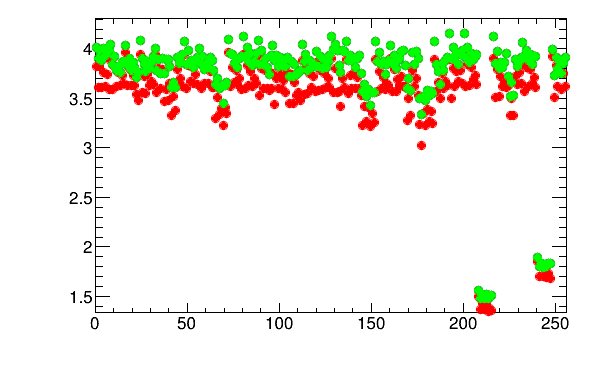

In [7]:
canvas = ROOT.TCanvas("canvas","",600,400)
leg = ROOT.TLegend(.7,.65,.88,.88)
h_1D_data_emcal.SetMarkerColor(1)
h_1D_sim_emcal.SetMarkerColor(2)
h_1D_var_emcal.SetMarkerColor(3)
h_1D_data_emcal.Draw()
h_1D_sim_emcal.Draw("same")
h_1D_var_emcal.Draw("same")
#leg.Draw()
canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


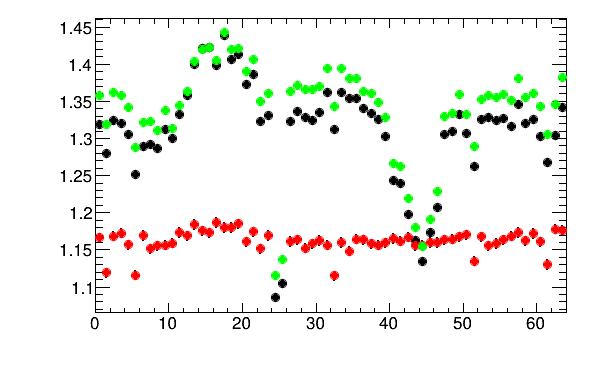

In [8]:
canvas = ROOT.TCanvas("canvas","",600,400)
leg = ROOT.TLegend(.7,.65,.88,.88)
h_1D_data_ihcal.SetMarkerColor(1)
h_1D_sim_ihcal.SetMarkerColor(2)
h_1D_var_ihcal.SetMarkerColor(3)
h_1D_data_ihcal.Draw()
h_1D_sim_ihcal.Draw("same")
h_1D_var_ihcal.Draw("same")
#leg.Draw()
canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


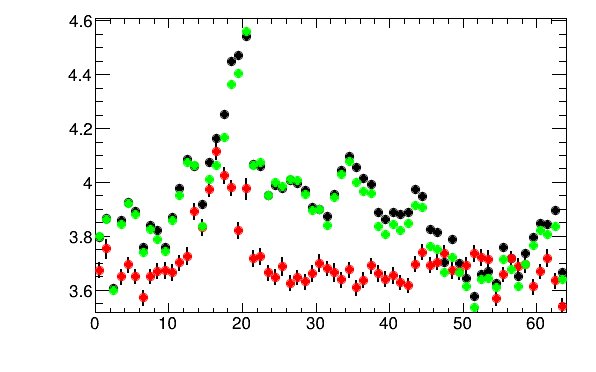

In [9]:
canvas = ROOT.TCanvas("canvas","",600,400)
leg = ROOT.TLegend(.7,.65,.88,.88)
h_1D_data_ohcal.SetMarkerColor(1)
h_1D_sim_ohcal.SetMarkerColor(2)
h_1D_var_ohcal.SetMarkerColor(3)
h_1D_data_ohcal.Draw()
h_1D_sim_ohcal.Draw("same")
h_1D_var_ohcal.Draw("same")
#leg.Draw()
canvas.Draw()

In [12]:
emcal_ratio.Rebin(2)
emcal_ratio.Scale(1.0/2)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


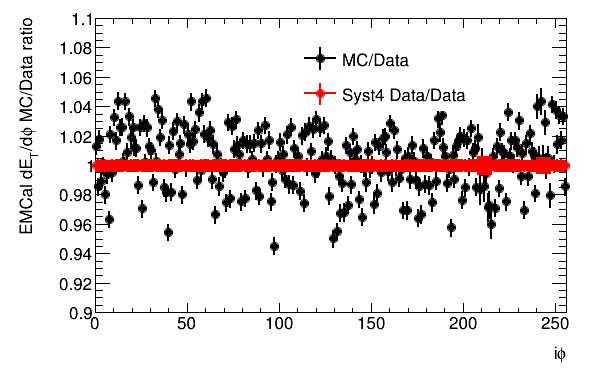

In [10]:
canvas = ROOT.TCanvas("canvas","",600,400)
leg = ROOT.TLegend(.5,.7,.8,.89)
leg.AddEntry(emcal_ratio,"MC/Data","lep")
leg.AddEntry(emcal_var_ratio,"Syst4 Data/Data","lep")
emcal_ratio.SetYTitle("EMCal dE_{T}/d#phi MC/Data ratio")
emcal_ratio.SetXTitle("i#phi")
emcal_ratio.GetYaxis().SetRangeUser(0.9,1.1)
emcal_ratio.Draw()
emcal_var_ratio.SetMarkerColor(2)
emcal_var_ratio.SetLineColor(2)
emcal_var_ratio.Draw("same")
leg.Draw()
canvas.Draw()

In [148]:
ihcal_ratio.Rebin(2)
ihcal_ratio.Scale(1.0/2)
ohcal_ratio.Rebin(2)
ohcal_ratio.Scale(1.0/2)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


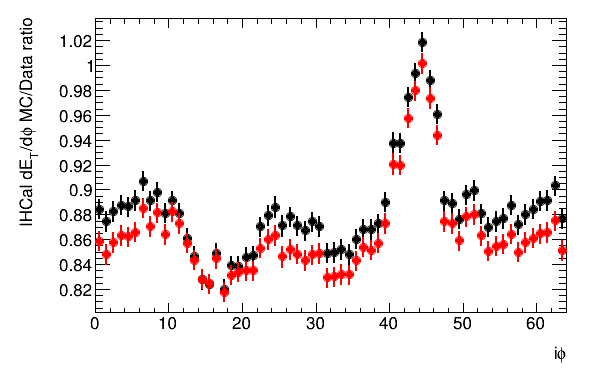

In [11]:
canvas = ROOT.TCanvas("canvas","",600,400)
ihcal_ratio.SetYTitle("IHCal dE_{T}/d#phi MC/Data ratio")
ihcal_ratio.SetXTitle("i#phi")
ihcal_var_ratio.SetMarkerColor(2)
ihcal_var_ratio.SetLineColor(2)
ihcal_ratio.Draw()
ihcal_var_ratio.Draw("same")
canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


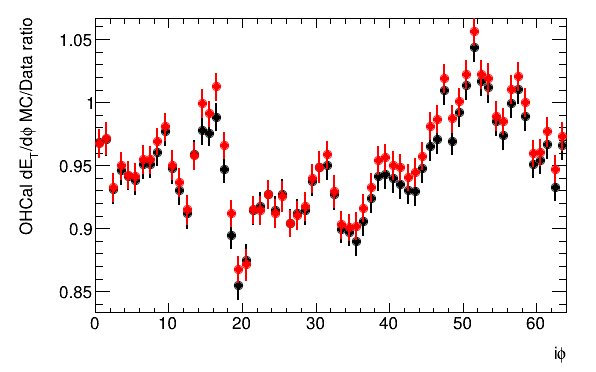

In [12]:
canvas = ROOT.TCanvas("canvas","",600,400)
ohcal_ratio.SetYTitle("OHCal dE_{T}/d#phi MC/Data ratio")
ohcal_ratio.SetXTitle("i#phi")
ohcal_var_ratio.SetMarkerColor(2)
ohcal_var_ratio.SetLineColor(2)
ohcal_ratio.Draw()
ohcal_var_ratio.Draw("same")
canvas.Draw()

In [44]:
emcal_eta_ratio = h_eT_data_emcal.Clone("emcal_eta_ratio")
ihcal_eta_ratio = h_eT_data_ihcal.Clone("ihcal_eta_ratio")
ohcal_eta_ratio = h_eT_data_ohcal.Clone("ohcal_eta_ratio")
for i in range(1, emcal_eta_ratio.GetNbinsX() + 1):
    emcal_eta_ratio.SetBinContent(i,h_eT_sim_emcal.GetBinContent(i)/h_eT_data_emcal.GetBinContent(i))
    emcal_eta_ratio.SetBinError(i,0)
for i in range(1, ihcal_eta_ratio.GetNbinsX() + 1):
    ihcal_eta_ratio.SetBinContent(i,h_eT_sim_ihcal.GetBinContent(i)/h_eT_data_ihcal.GetBinContent(i))
    ohcal_eta_ratio.SetBinContent(i,h_eT_sim_ohcal.GetBinContent(i)/h_eT_data_ohcal.GetBinContent(i))
    ihcal_eta_ratio.SetBinError(i,0)
    ohcal_eta_ratio.SetBinError(i,0)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


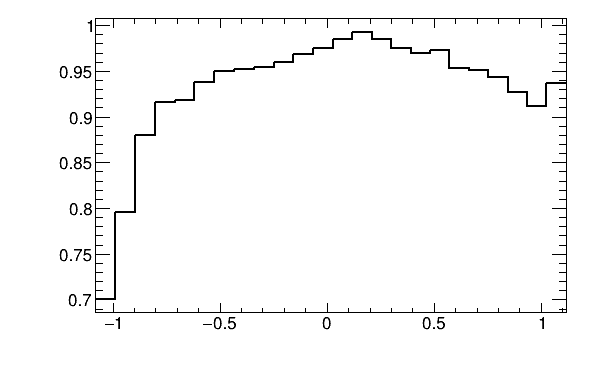

In [45]:
canvas = ROOT.TCanvas("canvas","",600,400)
emcal_eta_ratio.Draw()
canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


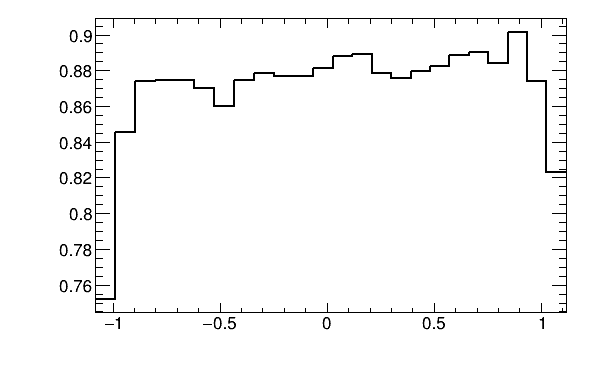

In [46]:
canvas = ROOT.TCanvas("canvas","",600,400)
ihcal_eta_ratio.Draw()
canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


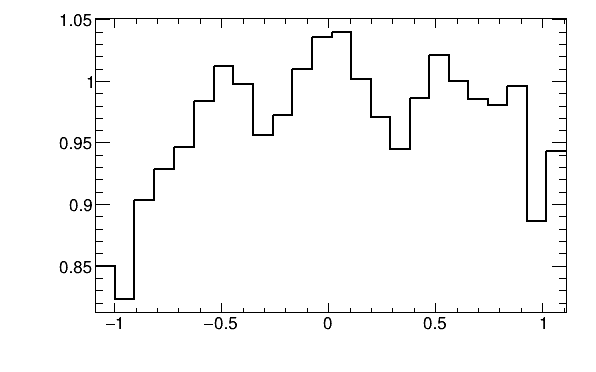

In [47]:
canvas = ROOT.TCanvas("canvas","",600,400)
ohcal_eta_ratio.Draw()
canvas.Draw()